In [3]:
import joblib  # model 호출용
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

ModuleNotFoundError: No module named 'tensorflow.python.keras.applications'

In [96]:
# model = joblib.load("220502_rf_mnist.pkl")
model = load_model("model.h5")

NameError: name 'load_model' is not defined

In [6]:
src = cv2.imread("../dataset/handwrite.png")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

In [7]:
th, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

In [8]:
th

150.0

In [9]:
bin_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [11]:
# 글자를 밝은 값으로 inverse
bin_img = 255 - bin_img
bin_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

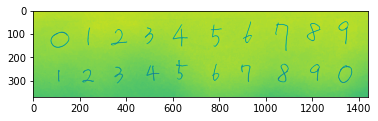

In [28]:
plt.imshow(gray)

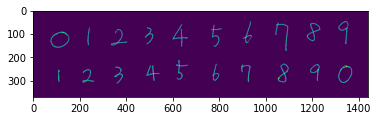

In [29]:
plt.imshow(bin_img)

# cv.connectedComponentsWithStats
```python
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(img)
```
- retval : blob의 개수 (배경 포함, 배경=0)
- labels : 레이블된 이미지
- stats : 바운딩 박스.  x, y, w, h, area 순서
- centroids : 중점 좌표

In [31]:
# 블롭 구하기
n_blob, label_img, stats, centroids = cv2.connectedComponentsWithStats(bin_img)

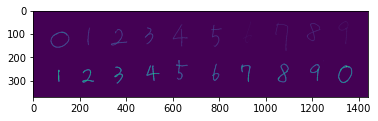

In [34]:
plt.imshow(label_img)

In [35]:
stats  # x, y, w, h, area

array([[     0,      0,   1440,    370, 525722],
       [   903,     49,     37,     91,    317],
       [  1314,     48,     41,     97,    375],
       [  1043,     54,     53,    120,    442],
       [  1178,     56,     58,     76,    446],
       [   601,     61,     64,     94,    427],
       [   766,     63,     46,     92,    349],
       [   235,     75,     10,     74,    157],
       [   481,     75,     35,     70,    278],
       [   336,     82,     69,     68,    344],
       [   354,     90,      4,      7,     17],
       [    76,     93,     79,     66,    497],
       [   354,     99,      1,      1,      1],
       [   615,    214,     50,     81,    362],
       [  1247,    216,      1,      1,      1],
       [   771,    229,     29,     71,    266],
       [  1053,    229,     45,     78,    481],
       [  1192,    231,     40,     70,    349],
       [   896,    233,     38,     73,    316],
       [   489,    236,     54,     65,    390],
       [  1313,    2

In [36]:
centroids

array([[ 718.82769981,  184.50155025],
       [ 922.86435331,  104.24290221],
       [1339.21866667,   85.77066667],
       [1075.15384615,   99.66968326],
       [1204.06726457,   91.68609865],
       [ 631.07259953,  109.83606557],
       [ 784.64183381,  105.25501433],
       [ 237.71974522,  113.30573248],
       [ 500.84532374,  107.39208633],
       [ 368.90116279,  125.92732558],
       [ 355.52941176,   93.11764706],
       [ 114.46277666,  123.97585513],
       [ 354.        ,   99.        ],
       [ 632.42541436,  251.61049724],
       [1247.        ,  216.        ],
       [ 783.36842105,  272.09398496],
       [1076.30561331,  269.55093555],
       [1216.16045845,  259.1260745 ],
       [ 917.25316456,  258.85759494],
       [ 511.06666667,  266.13333333],
       [1340.56378601,  269.8909465 ],
       [ 369.86942675,  273.64968153],
       [ 234.37730061,  283.41717791],
       [ 110.16058394,  278.7080292 ]])

In [37]:
# 블롭을 화면에 show
# n_blob : 0은 배경이므로 뺀다
show_img = src.copy()

In [39]:
for i in range(1, n_blob):
    x, y, w, h, area = stats[i]
    
    # 너무 작은 블롭은 제외
    if area > 20:
        cv2.rectangle(show_img, (x,y,w,h), (255,0,255), thickness=2)

In [94]:
# cropped_img = img[y: y + h, x: x + w]
for i in range(1, n_blob):
    x, y, w, h, area = stats[i]
    
    if area > 20:
        cropped_img = bin_img[y:y+h, x:x+w].copy()
        cropped_img = cv2.resize(bin_img, (28, 28))
        cropped_img = cropped_img.reshape(784)
        model.predict(cropped_img)
        # print(cropped_img)

ValueError: Expected 2D array, got 1D array instead:
array=[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  54.   0.   0.   9.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  42.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.   0.   0.   0.
   0. 164.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 191.   0.   0.   0.   0.   0.   0.
   0.  91.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. 128.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   5.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 127.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 205.   0.   0.   0.
   0.  36.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  91.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 191.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 210.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [56]:
from PIL import Image
# test.png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("../dataset/handwrite.png").convert("L")

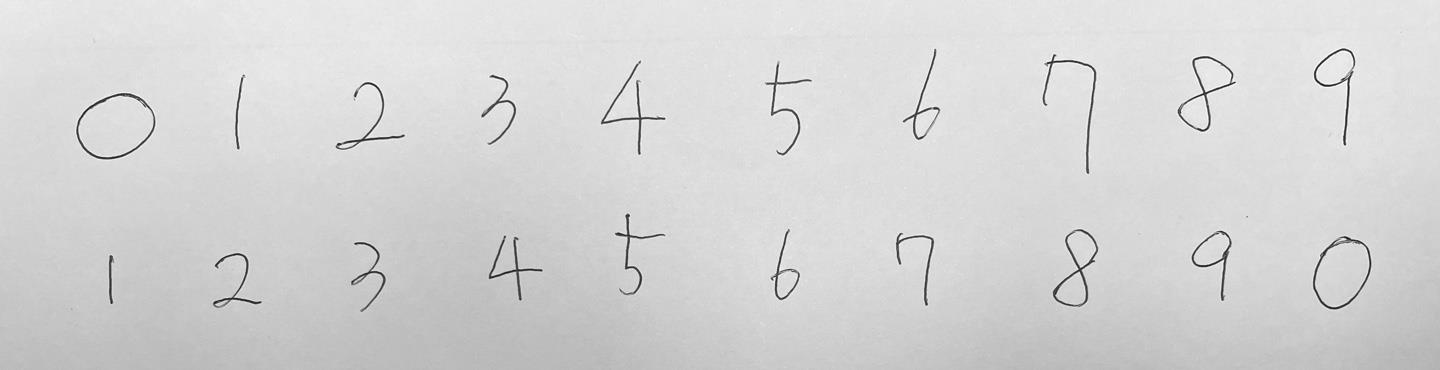

In [57]:
img

In [68]:
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, 
                        cv2.CHAIN_APPROX_SIMPLE)

In [69]:
contours

(array([[[110, 255]],
 
        [[109, 256]],
 
        [[109, 296]],
 
        [[110, 297]],
 
        [[110, 303]],
 
        [[112, 303]],
 
        [[112, 299]],
 
        [[111, 298]],
 
        [[111, 278]],
 
        [[110, 277]],
 
        [[110, 263]],
 
        [[111, 262]],
 
        [[111, 261]],
 
        [[112, 260]],
 
        [[113, 261]],
 
        [[113, 259]],
 
        [[112, 258]],
 
        [[112, 256]],
 
        [[111, 255]]], dtype=int32),
 array([[[234, 253]],
 
        [[233, 254]],
 
        [[231, 254]],
 
        [[230, 255]],
 
        [[227, 255]],
 
        [[226, 256]],
 
        [[225, 256]],
 
        [[224, 257]],
 
        [[223, 257]],
 
        [[222, 258]],
 
        [[221, 258]],
 
        [[215, 264]],
 
        [[215, 266]],
 
        [[216, 267]],
 
        [[217, 267]],
 
        [[217, 264]],
 
        [[220, 261]],
 
        [[222, 261]],
 
        [[223, 260]],
 
        [[223, 259]],
 
        [[225, 257]],
 
        [[226, 257]],
 
   

In [70]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [11,  9, -1, -1],
        [12, 10, -1, -1],
        [13, 11, -1, -1],
        [14, 12, -1, -1],
        [15, 13, -1, -1],
        [16, 14, -1, -1],
        [17, 15, -1, -1],
        [18, 16, -1, -1],
        [19, 17, -1, -1],
        [20, 18, -1, -1],
        [21, 19, -1, -1],
        [22, 20, -1, -1],
        [-1, 21, -1, -1]]], dtype=int32)

In [73]:
import numpy as np

ValueError: Found array with dim 4. Estimator expected <= 2.

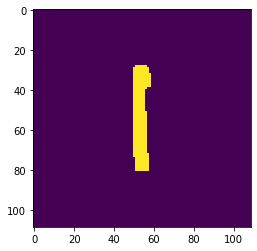

In [79]:
for contour in contours:

    x, y, w, h = cv2.boundingRect(contour)

    length = max(w, h) + 60
    img_digit = np.zeros((length, length, 1),np.uint8)

    new_x,new_y = x-(length - w)//2, y-(length - h)//2


    img_digit = bin_img[new_y:new_y+length, new_x:new_x+length]

    kernel = np.ones((5, 5), np.uint8)
    img_digit = cv2.morphologyEx(img_digit, cv2.MORPH_DILATE, kernel)

    plt.imshow(img_digit)
    # cv2.waitKey(0)

    model = joblib.load("220502_rf_mnist.pkl")

    img_digit = cv2.resize(img_digit, (28, 28), interpolation=cv2.INTER_AREA)

    img_digit = img_digit / 255.0

    img_input = img_digit.reshape(1, 28, 28, 1)
    predictions = model.predict(img_input)


    number = np.argmax(predictions)
    print(number)

    cv.rectangle(img_color, (x, y), (x+w, y+h), (255, 255, 0), 2)


    location = (x + int(w *0.5), y - 10)
    font = cv.FONT_HERSHEY_COMPLEX  
    fontScale = 1.2
    cv.putText(img_color, str(number), location, font, fontScale, (0,255,0), 2)
    

    plt.imshow(img_digit)
    # cv.waitKey(0)